### Carregar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Carregar os dados 

In [2]:
df_vendas = pd.read_excel( "data/datasets.xlsx",
                            sheet_name=0 ,
                            skiprows=4, 
                            usecols=[2,3,4,5,6,7,8,9 ] )

df_produtos = pd.read_excel( "data/datasets.xlsx",
                            sheet_name=2 ,
                             )


df_consumidor = pd.read_excel( "data/datasets.xlsx",
                            sheet_name=3 ,
                            )


df_lojas = pd.read_excel( "data/datasets.xlsx",
                            sheet_name=4 ,
                             )



### Dados vendas

In [3]:
df_vendas.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21


### Dados Consumidor

In [4]:
df_consumidor.head()

,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,1985-06-28,Homem
1,14002,Florianópolis,SC,1987-01-10,Homem
2,14003,Rio de Janeiro,RJ,1979-11-05,Homem
3,14004,Rio de Janeiro,RJ,1983-11-25,Mulher
4,14005,Florianópolis,SC,1969-04-07,Homem


### Dados Produtos

In [5]:
df_produtos.head( )

,ID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M


### Dados Lojas

In [6]:
df_lojas.head()

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP


## Descrição dos dados

In [7]:
#Renomear Columas
df_produtos.columns = ['ProductID','NameProduct','SizeProduct' ]
df_consumidor.columns = [ 'ClientID', 'CityClient', 'StateCLient' , 'DateOfBirth' , 'Sex' ]
df_lojas.columns = ['StoreID', 'NameStore', 'StateSore' ]

# Unir datasets
df = df_vendas.merge( df_produtos, how = 'left', on = 'ProductID')
df = df.merge( df_lojas, how = 'left', on = 'StoreID')
df = df.merge( df_consumidor, how = 'left', on = 'ClientID')

df.shape

(32753, 16)

### Checar os NaN

In [8]:
df.isna().sum()

ID             0
ProductID      0
ClientID       0
Discount       0
UnitPrice      0
Quantity       0
StoreID        0
Date           0
NameProduct    0
SizeProduct    0
NameStore      0
StateSore      0
CityClient     0
StateCLient    0
DateOfBirth    0
Sex            0
dtype: int64

### Verificar o Tamanho

In [9]:
print( 'Número de linhas na vendas : {}'.format( df.shape[0] ) )
print( 'Número de Colunas na vendas: {}'.format( df.shape[1] ) )

Número de linhas na vendas : 32753
Número de Colunas na vendas: 16


### Tipos dos dataset

In [10]:
df.dtypes

ID                     object
ProductID              object
ClientID                int64
Discount              float64
UnitPrice             float64
Quantity                int64
StoreID                 int64
Date           datetime64[ns]
NameProduct            object
SizeProduct            object
NameStore              object
StateSore              object
CityClient             object
StateCLient            object
DateOfBirth    datetime64[ns]
Sex                    object
dtype: object

## Descrição Estatistica

In [11]:
df_num = df.select_dtypes( include=['int64', 'float64'])

df_cat = df.select_dtypes( exclude=['int64', 'float64','datetime64[ns]'])

In [12]:
#Metricas Tendência Central - Mean e Median

ct1 = pd.DataFrame( df_num.apply( np.mean ) ).T
ct2 = pd.DataFrame( df_num.apply( np.median ) ).T

#Metricas Dispersão STD -Min - Max - Range - skew - Kurtosis

d1 = pd.DataFrame( df_num.apply( np.std ) ).T
d2 = pd.DataFrame( df_num.apply( min ) ).T
d3 = pd.DataFrame( df_num.apply( max ) ).T
d4 = pd.DataFrame( df_num.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( df_num.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( df_num.apply( lambda x: x.kurtosis() ) ).T

#Concatenar - Montar Tabela

df_desc =  pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
df_desc.columns = ['atributos','min','max','range','media','mediana','std','skew','kurtosis']

df_desc



,atributos,min,max,range,media,mediana,std,skew,kurtosis
0,ClientID,14001.00,28695.0,14694.00,21225.185937,21130.0,4262.129047,0.039784,-1.207853
1,Discount,0.08,0.1,0.02,0.093012,0.1,0.009536,-0.631752,-1.600987
2,UnitPrice,114.80,686.0,571.20,221.644967,204.4,112.533586,2.935387,9.318373
3,Quantity,1.00,3.0,2.00,1.058651,1.0,0.239603,3.994438,15.192824
4,StoreID,1.00,22.0,21.00,3.752389,3.0,3.827446,3.118095,11.735954


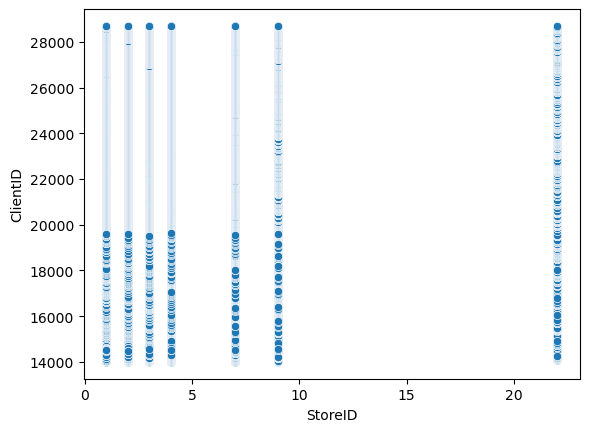

In [13]:
sns.scatterplot(x = 'StoreID', y= 'ClientID', data=df);

In [14]:
df.columns 


Index(['ID', 'ProductID', 'ClientID', 'Discount', 'UnitPrice', 'Quantity',
       'StoreID', 'Date', 'NameProduct', 'SizeProduct', 'NameStore',
       'StateSore', 'CityClient', 'StateCLient', 'DateOfBirth', 'Sex'],
      dtype='object')

In [15]:
df.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,NameProduct,SizeProduct,NameStore,StateSore,CityClient,StateCLient,DateOfBirth,Sex
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,Tempestade,G,Curitiba,PR,Curitiba,PR,1985-06-28,Homem
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,Thanos,G,Curitiba,PR,Curitiba,PR,1985-06-28,Homem
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,Capitão América,P,Curitiba,PR,Curitiba,PR,1985-06-28,Homem
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10,Wolverine,G,Florianópolis,SC,Florianópolis,SC,1987-01-10,Homem
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21,Naruto,G,Florianópolis,SC,Florianópolis,SC,1987-01-10,Homem


In [16]:
df[['ProductID','NameProduct','Quantity','SizeProduct']].groupby(['NameProduct','SizeProduct']).sum()

ProductID  \
NameProduct SizeProduct                                                      
BIXDream    G            00250175f79f584c14ab5cecd80553cd300250175f79f5...   
            M            00250175f79f584c14ab5cecd80553cd200250175f79f5...   
            P            00250175f79f584c14ab5cecd80553cd100250175f79f5...   
Batman      G            000d9be29b5207b54e86aa1b1ac548723000d9be29b520...   
            M            000d9be29b5207b54e86aa1b1ac548722000d9be29b520...   
...                                                                    ...   
Thor        M            00088930e925c41fd95ebfe695fd2655200088930e925c...   
            P            00088930e925c41fd95ebfe695fd2655100088930e925c...   
Wolverine   G            001b72dfd63e9833e8c02742adf472e33001b72dfd63e9...   
            M            001b72dfd63e9833e8c02742adf472e32001b72dfd63e9...   
            P            001b72dfd63e9833e8c02742adf472e31001b72dfd63e9...   

                         Quantity  
NameProduct SizeProduct            
BIXDream    G                 952  
            M                 231  
            P                 242  
Batman      G                 941  
            M                 240  
...                           ...  
Thor        M                 211  
            P                 225  
Wolverine   G                 965  
            M                 244  
            P                 243  

[73 rows x 2 columns]

In [17]:
df['VTotalProduct'] = df['UnitPrice'] * df['Quantity'] 

In [18]:
df.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,NameProduct,SizeProduct,NameStore,StateSore,CityClient,StateCLient,DateOfBirth,Sex,VTotalProduct
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,Tempestade,G,Curitiba,PR,Curitiba,PR,1985-06-28,Homem,249.2
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,Thanos,G,Curitiba,PR,Curitiba,PR,1985-06-28,Homem,162.4
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,Capitão América,P,Curitiba,PR,Curitiba,PR,1985-06-28,Homem,194.6
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10,Wolverine,G,Florianópolis,SC,Florianópolis,SC,1987-01-10,Homem,403.2
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21,Naruto,G,Florianópolis,SC,Florianópolis,SC,1987-01-10,Homem,406.0


In [19]:
df[['ProductID','NameProduct','VTotalProduct','SizeProduct']].groupby(['NameProduct','SizeProduct']).sum()

ProductID  \
NameProduct SizeProduct                                                      
BIXDream    G            00250175f79f584c14ab5cecd80553cd300250175f79f5...   
            M            00250175f79f584c14ab5cecd80553cd200250175f79f5...   
            P            00250175f79f584c14ab5cecd80553cd100250175f79f5...   
Batman      G            000d9be29b5207b54e86aa1b1ac548723000d9be29b520...   
            M            000d9be29b5207b54e86aa1b1ac548722000d9be29b520...   
...                                                                    ...   
Thor        M            00088930e925c41fd95ebfe695fd2655200088930e925c...   
            P            00088930e925c41fd95ebfe695fd2655100088930e925c...   
Wolverine   G            001b72dfd63e9833e8c02742adf472e33001b72dfd63e9...   
            M            001b72dfd63e9833e8c02742adf472e32001b72dfd63e9...   
            P            001b72dfd63e9833e8c02742adf472e31001b72dfd63e9...   

                         VTotalProduct  
NameProduct SizeProduct                 
BIXDream    G                 653072.0  
            M                 158466.0  
            P                 166012.0  
Batman      G                 220005.8  
            M                  56112.0  
...                                ...  
Thor        M                  24813.6  
            P                  26460.0  
Wolverine   G                 194544.0  
            M                  49190.4  
            P                  48988.8  

[73 rows x 2 columns]